In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from src.dataset import OxfordIIITPetDatamodule
from src.model import UNet
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor

/Users/madhurjindal/WorkProjects/ERA-v1/ERAenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
datamodule = OxfordIIITPetDatamodule(
    train_file="./data/OxfordPetDataset/annotations/trainval.txt",
    val_file="./data/OxfordPetDataset/annotations/test.txt",
    images_dir='./data/OxfordPetDataset/images', 
    masks_dir='data/OxfordPetDataset/annotations/trimaps',
    batch_size=32)

In [4]:
datamodule.prepare_data()

Training images: 3678
Validation images: 3668


In [35]:
datamodule.train_dataloader().dataset.show_image_mask(3)

In [114]:
for batch in datamodule.val_dataloader().dataset:
    if batch['image'].shape[0] != 3:
        print(batch['image'].shape)
        print()
        break
    if batch['mask'].shape[0] != 1:
        print(batch['mask'].shape)
        break

KeyboardInterrupt: 

In [9]:
model = UNet(max_filter_size=512,)

In [10]:
trainer = pl.Trainer(
    max_epochs=25,
    callbacks=[LearningRateMonitor(logging_interval='step', log_momentum=True)],
    check_val_every_n_epoch=3,
)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.


In [11]:
trainer.fit(model, datamodule)


   | Name       | Type               | Params
---------------------------------------------------
0  | loss_fn    | MulticlassDiceLoss | 0     
1  | cblock1    | EncoderMiniBlock   | 10.3 K
2  | cblock2    | EncoderMiniBlock   | 55.7 K
3  | cblock3    | EncoderMiniBlock   | 221 K 
4  | cblock4    | EncoderMiniBlock   | 886 K 
5  | cblock5    | EncoderMiniBlock   | 1.2 M 
6  | ublock1    | DecoderMiniBlock   | 1.5 M 
7  | ublock2    | DecoderMiniBlock   | 369 K 
8  | ublock3    | DecoderMiniBlock   | 92.4 K
9  | ublock4    | DecoderMiniBlock   | 23.2 K
10 | final_conv | Conv2d             | 51    
---------------------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.264    Total estimated model params size (MB)
/Users/madhurjindal/WorkProjects/ERA-v1/ERAenv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many wor

Training images: 3678
Validation images: 3668
Epoch 0: 100%|██████████| 1/1 [00:57<00:00, 57.88s/it, v_num=, train_loss_step=0.735, val_loss_step=1.120, val_acc_step=1.620, val_loss_epoch=1.120, val_acc_epoch=1.620, train_loss_epoch=0.735]

`Trainer.fit` stopped: `max_steps=1` reached.


Epoch: 0 Train Loss: 0.7348143458366394
Epoch 0: 100%|██████████| 1/1 [00:57<00:00, 57.89s/it, v_num=, train_loss_step=0.735, val_loss_step=1.120, val_acc_step=1.620, val_loss_epoch=1.120, val_acc_epoch=1.620, train_loss_epoch=0.735]


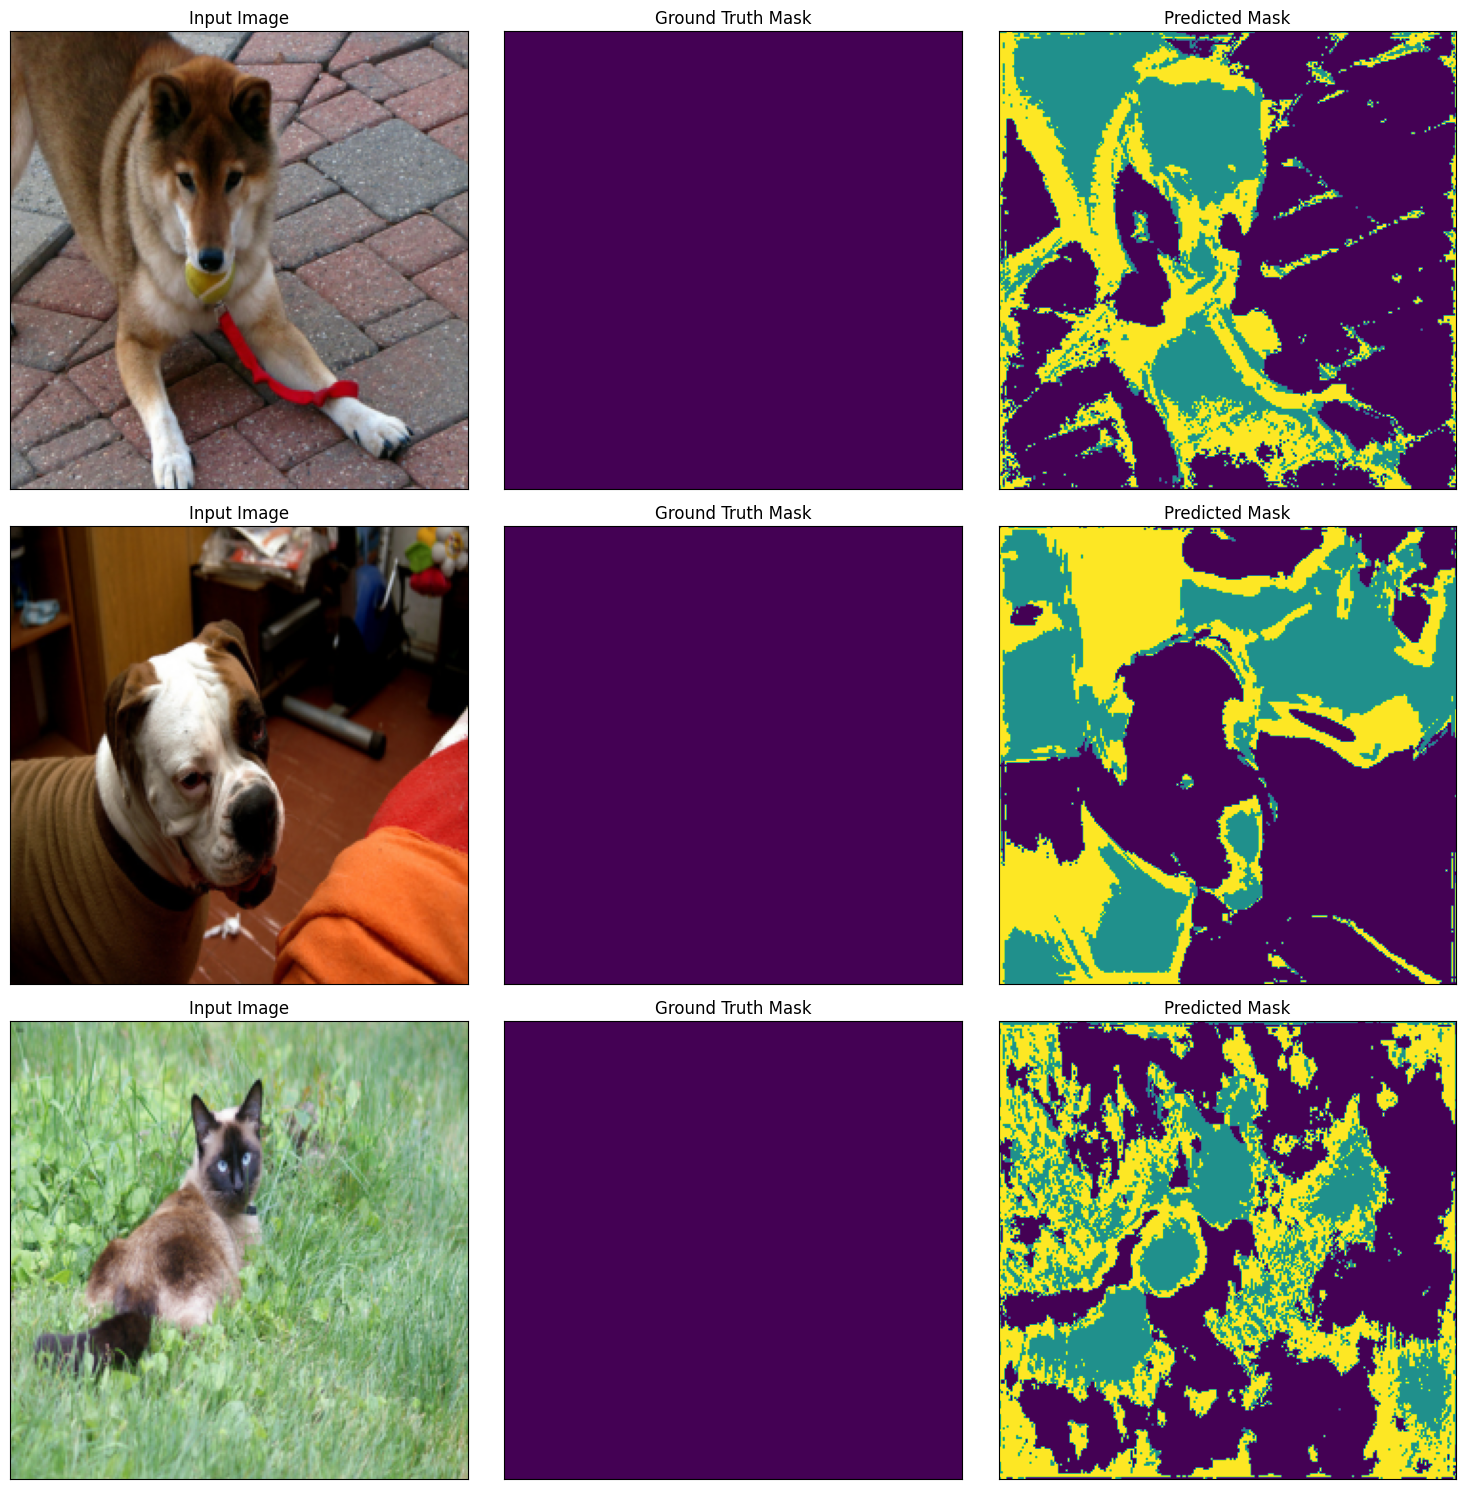

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [2, 2, 1,  ..., 2, 1, 0],
        [2, 2, 2,  ..., 2, 2, 0],
        ...,
        [2, 2, 2,  ..., 2, 0, 2],
        [2, 2, 2,  ..., 2, 2, 0],
        [1, 2, 2,  ..., 0, 2, 0]])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])


In [42]:
model.plot_random_test_samples(num_samples=3)